In [271]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
from lxml import etree
from unicodedata import normalize
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
state_name = pd.read_excel('state_and_abv.xlsx')

In [244]:
df2 = pd.merge(df,state_name,how='inner',on='state')
df2["city"] = df2['city'].astype(str) +", "+ df2["ABV"]

In [246]:
groupeddf = (df2.groupby(['state', 'ABV']).agg({'killed':'sum', 'injured': 'sum', 'victims': 'sum'})).reset_index()

In [247]:
groupeddf['killed'] = groupeddf['killed'].astype(float)
groupeddf['injured'] = groupeddf['injured'].astype(float)
groupeddf['victims'] = groupeddf['victims'].astype(float)

In [248]:
barchart_data = groupeddf.copy()
barchart_data = barchart_data.sort_values('victims', ascending=True)

<Figure size 1400x1000 with 0 Axes>

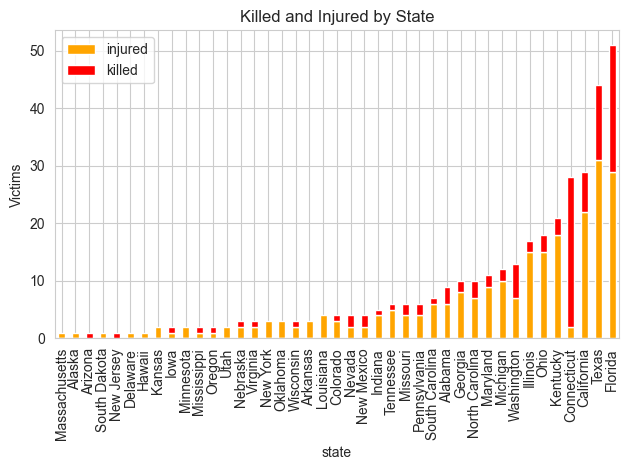

In [250]:
fig = plt.figure(figsize=(14,10))
ax = barchart_data[["state", "injured", "killed"]].plot.bar(x="state", stacked=True, color=('orange', 'red'))
plt.title("Killed and Injured by State")
plt.ylabel("Victims")
plt.tight_layout()

In [253]:
byCity = df2.groupby(['city']).agg({'killed':'sum', 'injured': 'sum', 'victims': 'sum'}).reset_index()
byCity = byCity.head(15).sort_values('victims',ascending=True).reset_index(drop=True)

Text(0.5, 0, 'City')

<Figure size 1400x1000 with 0 Axes>

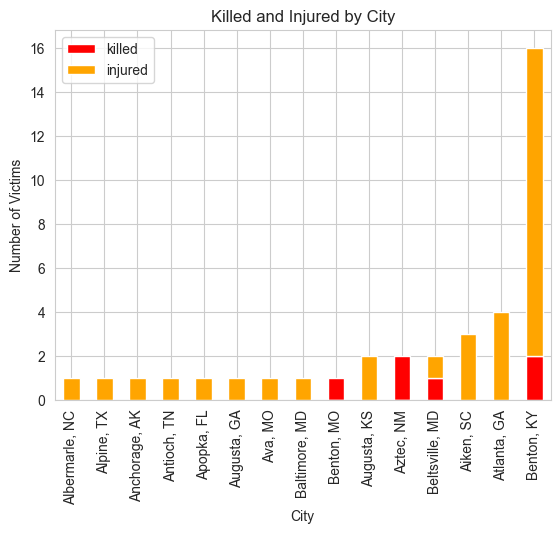

In [260]:
fig = plt.figure(figsize=(14,10))
ax = byCity[["city", "killed", "injured"]].plot.bar(x="city", stacked=True, color=('red', 'orange'))
plt.title("Killed and Injured by City")
plt.ylabel("Number of Victims")
plt.xlabel('City')

In [156]:
data = dict(type='choropleth',
           colorscale = 'reds',
            reversescale = False,
           locations = groupeddf['ABV'],
           locationmode = 'USA-states',
           z = groupeddf['killed'],
           text = groupeddf['state'],
           marker = dict(line = dict(color = 'rgb(12,12,12)', width=1)),
           colorbar= {'title': 'Killed'},
           )

In [30]:
layout = dict(title = 'School Shootings in America',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [157]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [59]:
byYear = df2.year.value_counts().sort_index()

Text(0.5, 1.0, 'School Shootings')

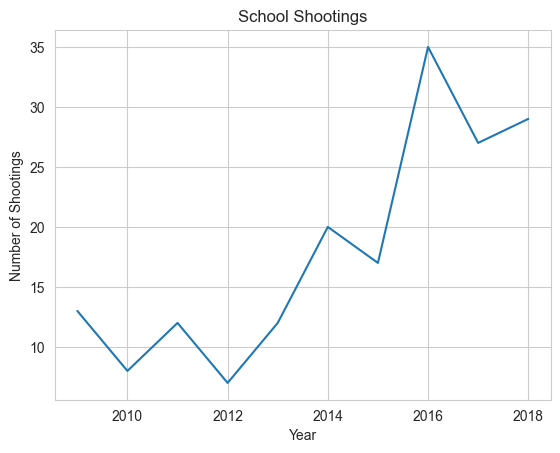

In [261]:
 byYear.plot()
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.title('School Shootings')

Text(0.5, 1.0, 'Number of Shootings by Race')

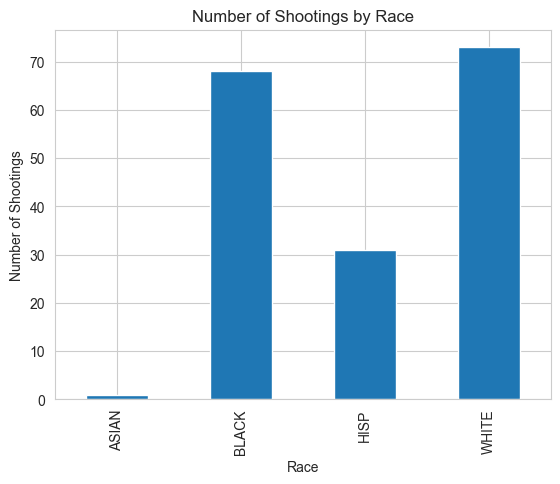

In [80]:
byRace = df2.race.value_counts().sort_index()
byRace.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Race')

Text(0.5, 1.0, 'Number of Shootings by Type Level')

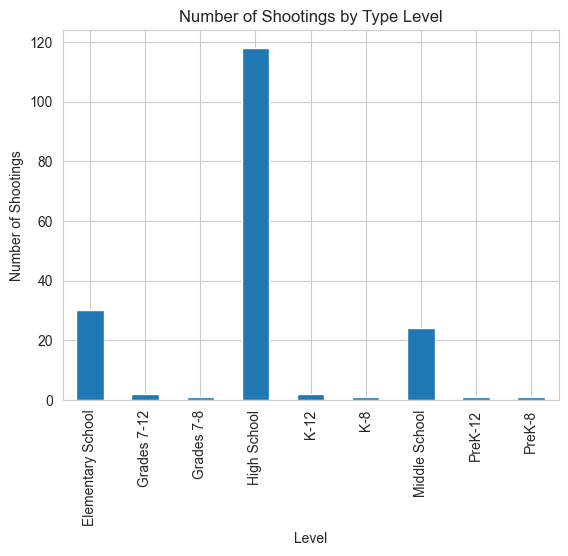

In [262]:
df2.type.value_counts()[0:50].sort_index().plot(kind='bar')
plt.ylabel('Number of Shootings')
plt.xlabel('Level')
plt.title('Number of Shootings by Type Level')

Text(0.5, 1.0, 'Number of Shootings by Location')

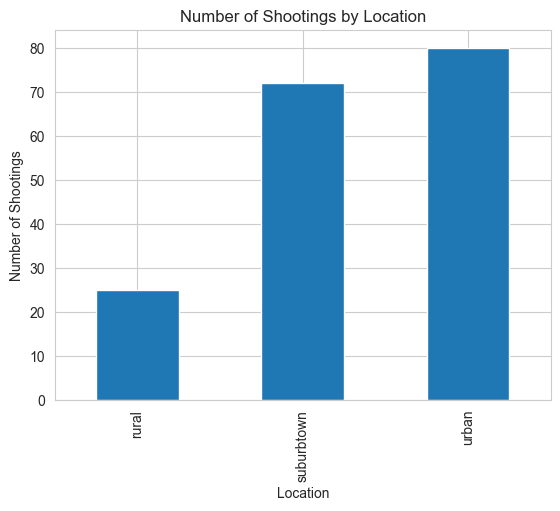

In [82]:
byLoc = df2.urbanrural.value_counts().sort_index()
byLoc.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Location')

In [114]:
killedYear = (df2.groupby(['year']).agg({'killed': 'sum', 'injured': 'sum', 'victims':'sum'})).reset_index()

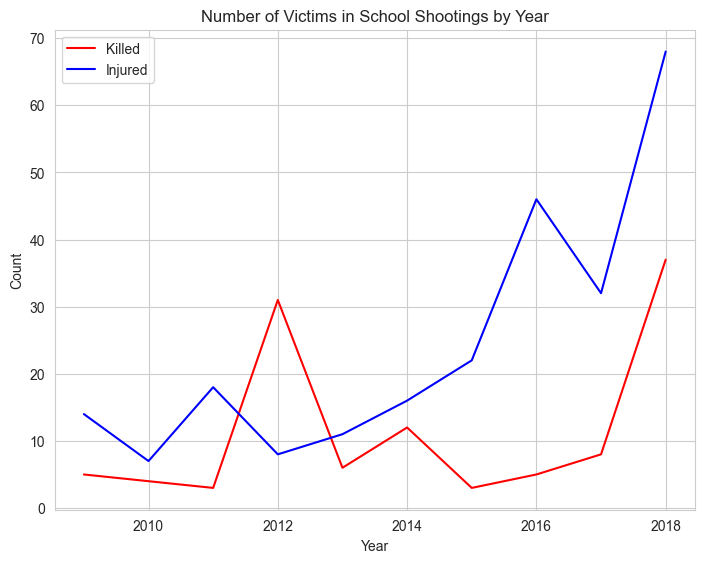

In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(killedYear['year'], killedYear['killed'], color='red', label='Killed')
ax.plot(killedYear['year'], killedYear['injured'], color='blue', label='Injured')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Number of Victims in School Shootings by Year')
ax.legend()

In [280]:
victims = killedYear.copy()
victims = victims.drop('victims', axis=1)

In [288]:
victims.iplot(x='year', xTitle='Year', yTitle='Victims', title='Victims in Shool Shootings by Year', width=4)